* Name: Parth Kodnani 
* Course: BUDT704 
* Section: 0502
* Date: 11/21/2021

# Analysis of Health Inspections Across Prince George's County

In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import plotly.graph_objects as go

## Data Cleaning
1. We check the dataset for unnecesary errors and process them to make it ready for our analysis.
2. We create several dummy variables to represent different categories.
3. We convert the dates from string objects to datetime objects.
4. We process the columns to make them suitable for further analysis.

### Case 1
1. Read in the data. 
2. Create a table of the unique values of Category. Which categories do you believe/observe represent a restaurant? Justify your response. 
3. Create a single dummy variable for Restaurant that combines multiple values from Category based on your selections.

### Steps for Case 1
1. We import the dataset to create a dataframe.
2. We check all the unique categories of Establishments and we we try to group those categories which could belong under the 'Restaurant' Tag.
3. We identify these categories with a single dummy variable.

In [3]:
dfFoodInspection = pd.read_csv(r'HW6_pgcounty_food_inspection.csv') # To create a dataframe from given data
dfFoodInspection.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Hot_and_cold_running_water_provided,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,5/13/2020 0:00,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787)
1,16073,Anarkali Bazar,Grocery Store,3/24/2020 0:00,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396)
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,5/11/2020 0:00,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661)
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,5/9/2020 0:00,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813)
4,16073,Anarkali Bazar,Grocery Store,3/31/2020 0:00,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396)


In [4]:
# To find the substitute categories of Restaurants
uniqueSeries = pd.DataFrame(dfFoodInspection['Category'].unique())
uniqueSeries

,0
0,Restaurant
1,Grocery Store
2,Fast Food - Local
3,Carry-out
4,Convenience Store
...,...
57,B & B
58,School
59,@Fast Food-Do Not Use
60,Farm Market


### Observation
* All types of Fast food stores constitute as a part of Restaurants.
* Carry out food also usually comes from restaurants/ fast food stores; hence even they can be categorized as a part of Restaurants.
* Delis and diners can also be considered as a part of Restaurants as these places form a subset of the Restaurant chain.
* Seafood, Pizza are usually served in restaurants; hence categorizes as part of Restaurants.
* Coffee Shops, Bakery, Cafeteria, Bar/Lounge can all be considered as a part of the bigger term 'Restaurant'.
* Delivery-only services can be called a virtual restaurant.

Ref - https://getsling.com/blog/types-of-restaurants/

In [5]:
# To create a column with a dummy variable for all the categories falling under the 'Restaurant' bracket
restaurant = ['Restaurant', 'Seafood', 'Ice Cream', 'Coffee Shop', 'Bakery', 'Bar/Tavern/Lounge', 'Cafeteria', 'Pizza', 'Delivery Only', 'Fast Food - Local', 'Buffet', 'Carry-out', 'Fast Food - Chain', 'Fast Food', 'Deli', '@Fast Food', 'Diner', '@Fast Food-Do Not Use']
dfFoodInspection['Restaurant'] = dfFoodInspection['Category'].apply(lambda x: 1 if x in restaurant else 0)

In [6]:
dfFoodInspection.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Restaurant
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,5/13/2020 0:00,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1
1,16073,Anarkali Bazar,Grocery Store,3/24/2020 0:00,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,5/11/2020 0:00,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,5/9/2020 0:00,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),1
4,16073,Anarkali Bazar,Grocery Store,3/31/2020 0:00,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0


### Case 2
1. Convert the Inspection_date column into a datetime column. 
2. Create a new column for the year of the inspection. Create a new column for the month of the inspection. Create a column for the year and month. 

### Steps for Case 2
1. We convert the date column from string to datetime object.
2. We slice the date into years, months and year-month.

In [7]:
dfFoodInspection['Inspection_date'] = pd.to_datetime(dfFoodInspection['Inspection_date']) # To convert to datetime object
dfFoodInspection.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Restaurant
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1
1,16073,Anarkali Bazar,Grocery Store,2020-03-24,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),1
4,16073,Anarkali Bazar,Grocery Store,2020-03-31,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0


In [8]:
dfFoodInspection['Inspection_year'], dfFoodInspection['Inspection_month'] = dfFoodInspection['Inspection_date'].dt.year, dfFoodInspection['Inspection_date'].dt.month # To create columns with year and month individually
dfFoodInspection.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Restaurant,Inspection_year,Inspection_month
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1,2020,5
1,16073,Anarkali Bazar,Grocery Store,2020-03-24,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0,2020,3
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1,2020,5
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),1,2020,5
4,16073,Anarkali Bazar,Grocery Store,2020-03-31,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0,2020,3


In [9]:
dfFoodInspection['Year-Month'] = dfFoodInspection['Inspection_date'].dt.to_period('M') # To slice till the date till the month
dfFoodInspection.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Restaurant,Inspection_year,Inspection_month,Year-Month
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1,2020,5,2020-05
1,16073,Anarkali Bazar,Grocery Store,2020-03-24,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0,2020,3,2020-03
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1,2020,5,2020-05
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),1,2020,5,2020-05
4,16073,Anarkali Bazar,Grocery Store,2020-03-31,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0,2020,3,2020-03


### Case 3
1. For each column with the type of compliance (e.g. "Proper Hand Washing"), create a dummy variable, that is, 1 if the establishment is out of compliance and 0 otherwise. Use a NaN value for not applicable. 
2. Drop the string columns (retain only the dummy variables). 

### Steps for Case 3
1. We replace the text into dummy variables for all the different types of compliances.

In [10]:
# To see the unique categories to check whether any 'NaN' values are present
dfFoodInspection['Food_contact_surfaces_and_equipment'].unique()

array(['In Compliance', 'Out of Compliance'], dtype=object)

In [11]:
# To replace with dummy variables
dfFoodInspection = dfFoodInspection.replace('In Compliance', 0).replace('Out of Compliance', 1)
dfFoodInspection.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Restaurant,Inspection_year,Inspection_month,Year-Month
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,0,0,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1,2020,5,2020-05
1,16073,Anarkali Bazar,Grocery Store,2020-03-24,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,0,0,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0,2020,3,2020-03
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,0,0,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1,2020,5,2020-05
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,0,0,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),1,2020,5,2020-05
4,16073,Anarkali Bazar,Grocery Store,2020-03-31,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,0,0,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396),0,2020,3,2020-03


### Case 4
1. Create a new column that contains the number of violations for that inspection (the number of categories where the establishment was not in compliance). 
2. Create a dummy variable that is 1 if the establishment is out of compliance in any category.  

### Steps for Case 4
1. We sum the number of violations for each establishment.
2. For the establishments having violations, we identify these categories with a single dummy variable.

In [12]:
noOfViolations = dfFoodInspection.iloc[:, 10:25].sum(axis = 1) # To sum through all the categories to count number of violations
noOfViolations

0        0
1        0
2        0
3        0
4        0
        ..
37899    1
37900    0
37901    0
37902    0
37903    0
Length: 37904, dtype: int64

In [13]:
noOfViolations.unique() # To see total number of violations an establishment could have made

array([0, 1, 2, 4, 3, 5, 6, 7, 8], dtype=int64)

In [14]:
dfFoodInspection['Number_of_violations'] = noOfViolations
dfFoodInspection['No_compliance'] = dfFoodInspection['Number_of_violations'].apply(lambda x: 1 if x > 0 else 0)
dfFoodInspection.tail()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Inspection_type,Owner,Type,Location,Restaurant,Inspection_year,Inspection_month,Year-Month,Number_of_violations,No_compliance
37899,1186,PORT TOWNS ELEMENTARY SCHOOL,Public School,2021-10-04,Non-Compliant - Violations Observed,BLADENSBURG,MD,20710.0,4351 58TH AVE,------,...,Comprehensive,MARK FOSSETT,Food Establishments,POINT (-76.913121 38.947072),0,2021,10,2021-10,1,1
37900,2266,SIX FLAGS AMERICA - COFFEE & CONES,Stadium/Amusement Park,2021-10-02,Compliant - No Health Risk,MITCHELLVILLE,MD,20721.0,13710 CENTRAL AVE,------,...,Single Foodborne Illness,RICK HOWARTH,Food Establishments,POINT (-76.775193 38.90087),0,2021,10,2021-10,0,0
37901,1400,SIX FLAGS AMERICA - TEX'S TURKEY LEGS & DOGS,Stadium/Amusement Park,2021-10-02,Compliant - No Health Risk,MITCHELLVILLE,MD,20721.0,13710 CENTRAL AVE,------,...,Single Foodborne Illness,RICK HOWARTH,Food Establishments,POINT (-76.775193 38.90087),0,2021,10,2021-10,0,0
37902,2523,CVS PHARMACY 2239,Convenience Store,2021-10-01,Non-Compliant - Violations Observed,FORT WASHINGTON,MD,20744.0,8201 OXON HILL RD,------,...,Comprehensive,RUTH PAREDES,Food Establishments,POINT (-77.00597 38.777029),0,2021,10,2021-10,0,0
37903,16177,PANDA EXPRESS,Fast Food - Chain,2021-10-01,Non-Compliant - Violations Observed,BOWIE,MD,20720.0,10400 MARTIN LUTHER KING JR HWY,------,...,Food Complaint,ANDREW CHERNG,Food Establishments,POINT (-76.82624 38.956059),1,2021,10,2021-10,0,0


### Case 5
1. For establishments with multiple inspections, create a new DataFrame in wide format. Keep only the establishment ID, Category, Inspection_date, and number of violations. Make sure category is consistent within ID and resolve any discrepancies if necessary (i.e., each establishment has only one category). Reshape from long to wide (pivot) such that each establishment is a row and you have a column for the date and number of violations for inspection 1, inspection 2, inspection 3, etc. 
 

In [34]:
dfMulViolations = dfFoodInspection[['Establishment_id', 'Category', 'Inspection_date', 'Number_of_violations']]
dfMulViolations.sort_values(by = ['Establishment_id'])

,Establishment_id,Category,Inspection_date,Number_of_violations
6565,1,Gas Station Store,2017-02-06,0
8053,1,Gas Station Store,2014-09-22,2
4428,1,Gas Station Store,2017-09-27,0
5174,1,Gas Station Store,2015-12-07,1
1390,1,Gas Station Store,2019-11-26,1
...,...,...,...,...
37582,16559,NaN,2021-09-02,0
37343,16578,NaN,2021-08-02,0
37838,16595,NaN,2021-08-10,0
37859,16595,NaN,2021-07-27,4


In [28]:
# To create a multilevel index dataframe in the long format
dfMulViolations = dfMulViolations.set_index(['Establishment_id', 'Category', 'Inspection_date']).sort_index(level=['Establishment_id', 'Category', 'Inspection_date'])
dfMulViolations.head(50)

Number_of_violations
Establishment_id Category          Inspection_date                      
1                Gas Station Store 2012-02-13                          0
                                   2012-10-02                          0
                                   2013-01-02                          0
                                   2013-05-31                          0
                                   2013-08-22                          2
                                   2014-06-17                          0
                                   2014-09-22                          2
                                   2014-12-29                          1
                                   2015-08-13                          1
                                   2015-12-07                          1
                                   2016-03-10                          0
                                   2016-06-24                          0
                                   2016-10-24                          0
                                   2017-02-06                          0
                                   2017-09-27                          0
                                   2018-10-31                          0
                                   2019-11-08                          0
                                   2019-11-26                          1
                                   2019-11-26                          0
2                Carry-out         2011-07-19                          2
                                   2012-11-20                          1
                                   2012-12-03                          0
                                   2014-04-15                          0
                                   2014-10-22                          1
                                   2014-12-08                          0
                                   2015-01-26                          1
                                   2015-05-18                          0
                                   2016-01-28                          1
                                   2016-01-29                          0
                                   2016-06-10                          0
                                   2016-09-06                          1
                                   2017-02-08                          2
                                   2017-06-27                          0
                                   2017-10-05                          0
                                   2017-10-06                          1
                                   2017-10-16                          0
                                   2019-07-01                          2
                 Fast Food - Chain 2020-01-10                          0
                                   2020-02-07                          0
                                   2021-02-25                          0
                                   2021-07-15                          0
3                Full Service      2013-03-08                          0
                                   2014-07-18                          0
                                   2014-07-18                          2
                                   2014-09-18                          0
                                   2016-01-12                          0
                                   2017-01-10                          0
                                   2017-01-24                          0
                                   2017-07-28                          2
                                   2017-08-01                          0

## Statistics/Data Grouping

### Case 6
1. What is the most common type of violation? The compliance categories are not mutually exclusive because one restaurant can have multiple violations. 
2. Create a table with the number of violations by violation type. Sort the table from the most common to least common violations. 

### Steps for Case 6
1. We only filter the violation categories and sum the total number of violations made per category.

In [64]:
# To sum the number of violations for each column
dfNoOfViolations = dfFoodInspection.iloc[:, 10:25].sum(axis = 0).sort_values(ascending = False)
dfNoOfViolations

Cold_holding_temperature               7216
Food_contact_surfaces_and_equipment    6575
Rodent_and_insects                     6428
Hot_holding_temperature                3615
Food_protected_from_contamination      1513
Proper_hand_washing                    1315
Cooling_time_and_temperature            363
Hot_and_cold_running_water_provided     256
Cooking_time_and_temperature            166
Reheating_time_and_temperature          142
Food_from_approved_source               113
Proper_sewage_disposal                   83
Ill_workers_restricted                   22
No_bare_hand_contact                      0
Adequate_hand_washing_facilities          0
dtype: int64

### Observations
1. The most common type of violation is 'Cold_holding_temperature' having 7216 violations.

### Case 7
1. For establishments with multiple inspections, how many reinspections does it take for an establishment to become compliant? Create a table where each row is the number of inspections a restaurant has had, and the columns are the number of reinspections until the establishment becomes compliant. 
2. Write 2-4 sentences with your observations. 

### Steps for Case 7
1. We create a dummy variable to count the number of dates.
2. We create another variable which shows cumulative values of dates of every establishment.
3. We use the function transform('max') to use the maximum count of inspections for the given establishment.
4. Next we create a variable which sees which establishhment had how many violations.
5. Finally, we create a pivot table which has Max Number of Inspections as rows, Cumulative Inspections as columns, and values comprise of the establishments who have compliance.

In [40]:
dfFoodInspection['Dummy_inspection'] = 1 # To create a dummy column to cumulative sum the Inspection Dates

In [54]:
dfFoodInspection1 = dfFoodInspection.sort_values(['Inspection_date']).reset_index(drop = True)
dfFoodInspection1['Cumulative_inspection'] = dfFoodInspection1.groupby(['Establishment_id'])['Dummy_inspection'].cumsum(axis = 0)
dfFoodInspection1.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Type,Location,Restaurant,Inspection_year,Inspection_month,Year-Month,Number_of_violations,No_compliance,Dummy_inspection,Cumulative_inspection
0,2160,RITA'S WATER ICE,Ice Cream,2011-07-01,------,OXON HILL,MD,20745.0,6243 LIVINGSTON RD,------,...,Food Establishments,POINT (-76.990394 38.805118),1,2011,7,2011-07,0,0,1,1
1,299,CHINA AMERICAN,Full Service,2011-07-01,------,Laurel,MD,20707.0,601 7th ST,104,...,Food Establishments,POINT (-76.855889 39.102561),0,2011,7,2011-07,2,1,1,1
2,311,CHINA EXPRESS CARRYOUT,Carry-out,2011-07-01,------,BELTSVILLE,MD,20705.0,3422 POWDER MILL RD,------,...,Food Establishments,POINT (-76.94714 39.040727),1,2011,7,2011-07,0,0,1,1
3,1429,SUBWAY,Fast Food,2011-07-01,------,OXON HILL,MD,20745.0,5119 INDIAN HEAD HWY,A,...,Food Establishments,POINT (-77.000162 38.819457),1,2011,7,2011-07,3,1,1,1
4,707,INDEPENDENCE COURT,Health Care Facility,2011-07-05,------,WEST HYATTSVILLE,MD,20782.0,5821 QUEENS CHAPEL RD,------,...,Food Establishments,POINT (-76.956129 38.960084),0,2011,7,2011-07,0,0,1,1


In [48]:
dfFoodInspection1.groupby(by = ['Establishment_id', 'Inspection_date', 'Cumulative_inspection'])['Dummy_inspection'].count()

Establishment_id  Inspection_date  Cumulative_inspection
1                 2012-02-13       1                        1
                  2012-10-02       2                        1
                  2013-01-02       3                        1
                  2013-05-31       4                        1
                  2013-08-22       5                        1
                                                           ..
16559             2021-09-02       1                        1
16578             2021-08-02       1                        1
16595             2021-07-27       1                        1
                  2021-08-10       2                        1
16773             2021-10-01       1                        1
Name: Dummy_inspection, Length: 37904, dtype: int64

In [55]:
dfFoodInspection1['Max_inspection'] = dfFoodInspection1.groupby(by = 'Establishment_id')['Cumulative_inspection'].transform('max')
dfFoodInspection1.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Location,Restaurant,Inspection_year,Inspection_month,Year-Month,Number_of_violations,No_compliance,Dummy_inspection,Cumulative_inspection,Max_inspection
0,2160,RITA'S WATER ICE,Ice Cream,2011-07-01,------,OXON HILL,MD,20745.0,6243 LIVINGSTON RD,------,...,POINT (-76.990394 38.805118),1,2011,7,2011-07,0,0,1,1,11
1,299,CHINA AMERICAN,Full Service,2011-07-01,------,Laurel,MD,20707.0,601 7th ST,104,...,POINT (-76.855889 39.102561),0,2011,7,2011-07,2,1,1,1,13
2,311,CHINA EXPRESS CARRYOUT,Carry-out,2011-07-01,------,BELTSVILLE,MD,20705.0,3422 POWDER MILL RD,------,...,POINT (-76.94714 39.040727),1,2011,7,2011-07,0,0,1,1,10
3,1429,SUBWAY,Fast Food,2011-07-01,------,OXON HILL,MD,20745.0,5119 INDIAN HEAD HWY,A,...,POINT (-77.000162 38.819457),1,2011,7,2011-07,3,1,1,1,18
4,707,INDEPENDENCE COURT,Health Care Facility,2011-07-05,------,WEST HYATTSVILLE,MD,20782.0,5821 QUEENS CHAPEL RD,------,...,POINT (-76.956129 38.960084),0,2011,7,2011-07,0,0,1,1,22


In [50]:
dfFoodInspection1["Compliance"] = dfFoodInspection1['No_compliance'].map(lambda x: 1 if x == 0 else 0)
dfReinspection = dfFoodInspection1.groupby(by = ['Max_inspection', 'Cumulative_inspection'])['Compliance'].sum().to_frame()
dfReinspection.reset_index(inplace = True)
dfReinspection

,Max_inspection,Cumulative_inspection,Compliance
0,1,1,194
1,2,1,167
2,2,2,192
3,3,1,121
4,3,2,143
...,...,...,...
882,61,57,1
883,61,58,1
884,61,59,1
885,61,60,1


In [52]:
dfReinspectionPivot = dfReinspection.pivot_table(index = 'Max_inspection', columns = 'Cumulative_inspection', values = 'Compliance', aggfunc = np.sum)
dfReinspectionPivot

Cumulative_inspection,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
Max_inspection,,,,,,,,,,,,,,,,,,,,,
1,194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167.0,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121.0,143.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,108.0,99.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,82.0,95.0,91.0,87.0,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,75.0,72.0,68.0,77.0,67.0,81.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,71.0,73.0,80.0,79.0,74.0,70.0,71.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,80.0,83.0,72.0,81.0,74.0,76.0,68.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,79.0,70.0,77.0,71.0,74.0,79.0,73.0,70.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations
* We observe that the maximum number of violations made is usually in the first inspection. And then it drops as the number of inspections increase.

### Case 8
1. Create a bar graph showing the results of violations from #6. 

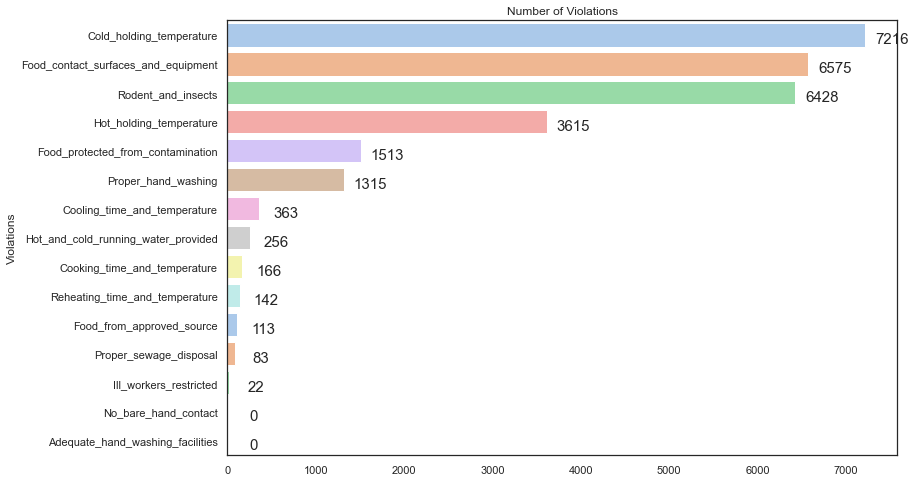

In [65]:
# To create a bar graph which displays the total number of violations per category
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')
axes = sns.barplot(x = dfNoOfViolations.values, y = dfNoOfViolations.index, palette = 'pastel', orient = 'h')
axes.set_title('Number of Violations')
axes.set(ylabel = 'Violations')
for bar, percent in zip (axes.patches, dfNoOfViolations.values):
    text_x = bar.get_width() + 300
    text_y = bar.get_y() + bar.get_height()
    text = f'{percent}'
    axes.text(text_x, text_y, text, fontsize = 15, ha = 'center' , va = 'bottom')

### Case 9
1. Create a line graph that shows the percent of restaurant inspections that have at least one violation by month and year. 
2. Are inspections getting harder or easier over time? Is there a particular month where more restaurants pass? Write 2-4 sentences with your observations. 

In [36]:
# To plot a line graph showing the percentage of restaurant inspections that have atleast one violation by month and year.
dfRestViolation = dfFoodInspection.loc[dfFoodInspection['Restaurant'] == 1, :]
dfRestViolation.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Inspection_type,Owner,Type,Location,Restaurant,Inspection_year,Inspection_month,Year-Month,Number_of_violations,No_compliance
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1,2020,5,2020-05,0,0
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1,2020,5,2020-05,0,0
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),1,2020,5,2020-05,0,0
5,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,Food Complaint,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),1,2020,5,2020-05,0,0
6,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,NaN,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),1,2020,5,2020-05,0,0


<AxesSubplot:xlabel='Year-Month'>

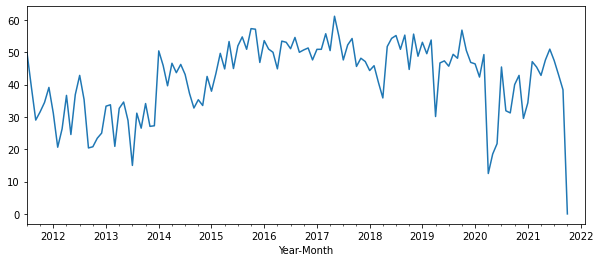

In [51]:
dfRestViolationPlot = dfRestViolation.groupby(by = 'Year-Month')['No_compliance'].sum()/dfFoodInspection.groupby(by = 'Year-Month')['Restaurant'].sum()*100
dfRestViolationPlot.plot(figsize = (10,4))

### Observations
* From the above graph, we see that the variation along the y-axis is increasing. For the years 2012-2014, The amount of restaurants that violated the rules was around 30% and the broken violations vary according to the different months.
* During the period 2014-2019, we see that the number of violations made by restaurants is at an all time high, with an average of about 40-45% restaurants and the averages stay there. We see that the violations made are about the same percentage for the entire period with very less variance. Which means that the strictness of the inspections must have dropped, leading to more resturants committing violations.
* We see that there is a steep drop after 2020, which means that the scrutiny of the restaurants must have gotten stricter on the account of some pressure. The fluctuations are also very high during the period 2020-2022.

### Case 10
1. Create a map that shows all restaurants. Color the restaurants with at least one violation in red. Are there particular areas with more violations? If there are clusters of violations, either through interactive visualization or by manually inspecting the data, look at the types of violations where there are clusters. Are there any trends? Write 2-4 sentences with your observations. If you did not use an interactive visualization, explain how you explored trends in violation type by area. You may also create a second map showing violation types.

In [ ]:
# To get the Latitude and Longitude of establishments 
dfFoodInspection['Longitude'] = dfFoodInspection['Location'].str.split(' ').str[1].str.replace('(','', regex=True).astype(float)
dfFoodInspection['Latitude'] = dfFoodInspection['Location'].str.split(' ').str[2].str.replace(')','', regex=True).astype(float)

# To obtain a map that shows all restaurants given dataset. 
map_access_token = 'pk.eyJ1IjoicGtvZG5hbmkiLCJhIjoiY2t3OXZxMjZrMTA2dDJ2cDk0bHYxZG1nNCJ9.T-pTNj5Lz-0wqcVIPv0f_w'
restaurant_map_data = go.Scattermapbox(
        lat = dfFoodInspection.loc[dfFoodInspection['Restaurant'] == 1,'Latitude'],
        lon = dfFoodInspection.loc[dfFoodInspection['Restaurant'] == 1,'Longitude'],
        text = dfFoodInspection['Name'],
        hoverinfo = 'text',
        mode = 'markers',
        marker = dict(
                    color = 'blue',
                    symbol = 'circle',
                    opacity = 0.5
                )
)

# To spot the restaurants having atleast one violation in red color
violation_map_data = go.Scattermapbox(
        lat = dfFoodInspection.loc[((dfFoodInspection['Restaurant']==1) & (dfFoodInspection['Number_of_violations']>0)),'Latitude'],
        lon = dfFoodInspection.loc[((dfFoodInspection['Restaurant']==1) & (dfFoodInspection['Number_of_violations']>0)),'Longitude'],
        text = dfFoodInspection['Name'],
        hoverinfo ='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )
)

restaurant_map_layout = go.Layout(
        title = 'Restaurants',
        mapbox = go.layout.Mapbox(
            accesstoken = map_access_token,
            zoom = 1
        )
    )

restaurant_map = go.Figure(data = [restaurant_map_data, violation_map_data], layout = restaurant_map_layout)
restaurant_map.show()

### Observations
* Above we observe a plot for resturants which have atleast one violations and resturants with no violations.
* Red dots indicate resturants having atleast one violation and blue indicates resturants with no violations.
* But we cleary observe that red dots are way more than the blue dots stating there are more resturants with violations.

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."
#### --Parth Kodnani